In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from moviepy import VideoFileClip

In [5]:
# Method to plot the audio waveform of a video file

def plot_audio_waveform_from_array(audio_array, fps):
    # If stereo, convert to mono by averaging channels
    if audio_array.ndim > 1:
        audio_data = np.mean(audio_array, axis=1)
    else:
        audio_data = audio_array

    audio_data = np.abs(audio_data)

    duration = len(audio_data) / fps
    time_axis = np.linspace(0, duration, num=len(audio_data))

    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, audio_data, color='steelblue')
    plt.title("Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
# Method to detect Claps using segmentation (first and last segments only)

def detect_claps_first_last_segments(audio_array, fps, num_segments):

    # convert stereo to mono
    audio_data = np.mean(audio_array, axis=1)

    abs_audio = np.abs(audio_data)
    segment_length = len(abs_audio) // num_segments
    claps = []

    # Process only the first and last segments
    segments_to_process = [0, num_segments - 1]
    for segment_index in segments_to_process:
        start_idx = segment_index * segment_length
        end_idx = (segment_index + 1) * segment_length if segment_index < num_segments - 1 else len(abs_audio)
        segment = abs_audio[start_idx:end_idx]
        
        if len(segment) > 0:
            # Find the maximum value in the segment
            max_idx = segment.argmax()

            clap_time = (start_idx + max_idx) / float(fps)
            claps.append((clap_time, start_idx + max_idx))

    return claps


In [26]:
# Method to process videos in a directory

def process_videos_in_directory(directory_path, audio_output_dir, num_segments):
    video_extension = ".mp4"
    clap_results = []

    # Create the audio output directory if it doesn't exist
    if not os.path.exists(audio_output_dir):
        os.makedirs(audio_output_dir)

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path) and os.path.splitext(filename.lower())[1] == video_extension:

            print(f"\nProcessing video: {filename}")
            try:
                clip = VideoFileClip(file_path)
                audio = clip.audio
                if audio is None:
                    print("  No audio track found.")
                    continue

                fps = audio.fps
                audio_array = audio.to_soundarray()

                # Save the audio to a file
                audio_output_path = os.path.join(audio_output_dir, f"{os.path.splitext(filename)[0]}.wav")
                audio.write_audiofile(audio_output_path)
                print(f"  Audio saved to {audio_output_path}")


                #plot_audio_waveform_from_array(audio_array, fps)

                # Now detect claps
                claps = detect_claps_first_last_segments(audio_array, fps=fps, num_segments=num_segments)

                if claps:
                    for c_time, frame in claps:
                        print(f"  Clap detected at {c_time:.2f} seconds (frame {frame})")
                
                duration_between_claps = claps[1][0] - claps[0][0]

                clap_results.append({"Filename": filename,
                                     "Start Clap Seconds": claps[0][0],
                                     "End Clap Seconds": claps[1][0],
                                     "Start Clap Frame": claps[0][1],
                                     "End Clap Frame": claps[1][1],
                                     "Audio Path": audio_output_path,
                                     "Duration Between Claps": duration_between_claps})


            except Exception as e:
                print(f"  Error processing {filename}: {e}")

    return clap_results


In [27]:
directory_path = os.path.join(os.path.dirname(os.getcwd()), "Data\\Neuer Ordner")
audio_output_path = os.path.join(os.path.dirname(os.getcwd()), "Data\\audio")
clap_results = process_videos_in_directory(directory_path, num_segments= 4, audio_output_dir=audio_output_path)


Processing video: GX010003.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010003.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010003.wav
  Clap detected at 0.37 seconds (frame 16434)
  Clap detected at 13.92 seconds (frame 613915)

Processing video: GX010004.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010004.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010004.wav
  Clap detected at 1.87 seconds (frame 82545)
  Clap detected at 35.98 seconds (frame 1586913)

Processing video: GX010005.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010005.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010005.wav
  Clap detected at 2.82 seconds (frame 124400)
  Clap detected at 35.03 seconds (frame 1544733)

Processing video: GX010006.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010006.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010006.wav
  Clap detected at 0.83 seconds (frame 36529)
  Clap detected at 34.06 seconds (frame 1502108)

Processing video: GX010007.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010007.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010007.wav
  Clap detected at 1.76 seconds (frame 77432)
  Clap detected at 17.82 seconds (frame 786072)

Processing video: GX010008.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010008.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010008.wav
  Clap detected at 3.30 seconds (frame 145730)
  Clap detected at 16.97 seconds (frame 748593)

Processing video: GX010009.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010009.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010009.wav
  Clap detected at 1.63 seconds (frame 71849)
  Clap detected at 10.58 seconds (frame 466760)

Processing video: GX010011.MP4


MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010011.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010011.wav
  Clap detected at 1.19 seconds (frame 52654)
  Clap detected at 10.41 seconds (frame 458956)

Processing video: GX010012.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010012.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010012.wav
  Clap detected at 1.39 seconds (frame 61185)
  Clap detected at 10.88 seconds (frame 479636)

Processing video: GX010013.MP4


MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010013.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010013.wav
  Clap detected at 0.95 seconds (frame 41977)
  Clap detected at 9.56 seconds (frame 421812)

Processing video: GX010014.MP4


MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010014.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010014.wav
  Clap detected at 1.29 seconds (frame 57091)
  Clap detected at 10.12 seconds (frame 446246)

Processing video: GX010015.MP4


MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010015.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010015.wav
  Clap detected at 0.88 seconds (frame 38646)
  Clap detected at 9.66 seconds (frame 425970)

Processing video: GX010016.MP4


MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010016.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010016.wav
  Clap detected at 1.20 seconds (frame 53035)
  Clap detected at 41.04 seconds (frame 1809690)

Processing video: GX010017.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010017.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010017.wav
  Clap detected at 1.96 seconds (frame 86269)
  Clap detected at 17.09 seconds (frame 753719)


In [28]:
import pandas as pd


df_clap_results = pd.DataFrame(clap_results)
df_clap_results


,Filename,Start Clap Seconds,End Clap Seconds,Start Clap Frame,End Clap Frame,Audio Path,Duration Between Claps
0,GX010003.MP4,0.372653,13.920975,16434,613915,c:\Users\niki\Desktop\Step-counter\Data\audio\...,13.548322
1,GX010004.MP4,1.871769,35.984422,82545,1586913,c:\Users\niki\Desktop\Step-counter\Data\audio\...,34.112653
2,GX010005.MP4,2.820862,35.027959,124400,1544733,c:\Users\niki\Desktop\Step-counter\Data\audio\...,32.207098
3,GX010006.MP4,0.828322,34.061406,36529,1502108,c:\Users\niki\Desktop\Step-counter\Data\audio\...,33.233084
4,GX010007.MP4,1.755828,17.824762,77432,786072,c:\Users\niki\Desktop\Step-counter\Data\audio\...,16.068934
5,GX010008.MP4,3.304535,16.974898,145730,748593,c:\Users\niki\Desktop\Step-counter\Data\audio\...,13.670363
6,GX010009.MP4,1.629229,10.584127,71849,466760,c:\Users\niki\Desktop\Step-counter\Data\audio\...,8.954898
7,GX010011.MP4,1.193968,10.407166,52654,458956,c:\Users\niki\Desktop\Step-counter\Data\audio\...,9.213197
8,GX010012.MP4,1.387415,10.876100,61185,479636,c:\Users\niki\Desktop\Step-counter\Data\audio\...,9.488685
9,GX010013.MP4,0.951859,9.564898,41977,421812,c:\Users\niki\Desktop\Step-counter\Data\audio\...,8.613039


# **FIND PEAKS IN ACCELERATION DATA**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to load accelerometer data
def load_accelerometer_data(acc_data_path, sampling_frequency=256):
    """
    Load accelerometer data from a CSV file and preprocess it.

    Parameters:
        acc_data_path (str): Path to the accelerometer CSV file.
        sampling_frequency (int): Sampling frequency of the data.

    Returns:
        pd.DataFrame: Preprocessed data with X, Y, Z columns as floats.
        pd.Series: Time in seconds starting from 0.
    """
    raw_data = pd.read_csv(
        acc_data_path,
        skiprows=10,
        names=["X", "Y", "Z"],
        delimiter=',',
        decimal=","
    )
    raw_data = raw_data.iloc[1:].reset_index(drop=True)
    cleaned_data = raw_data.apply(pd.to_numeric, errors='coerce').dropna()
    time_seconds = (cleaned_data.index - cleaned_data.index[0]) / sampling_frequency
    return cleaned_data, time_seconds

# Function to normalize data
def normalize_data(data):
    """
    Normalize the accelerometer data to combine X, Y, Z axes into a single norm.

    Parameters:
        data (pd.DataFrame): DataFrame with X, Y, Z acceleration data.

    Returns:
        pd.Series: Normalized data combining all axes.
    """
    return np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)

# Function to plot data for a specific time interval
def plot_accelerometer_data_interval(cleaned_data, time_seconds, start_time=None, end_time=None, title_suffix="Full Duration"):
    """
    Plot accelerometer data (X, Y, Z) for a specified time interval.

    Parameters:
        cleaned_data (pd.DataFrame): DataFrame with X, Y, Z acceleration data.
        time_seconds (pd.Series): Time values in seconds.
        start_time (float): Start time for the interval (default is None for full duration).
        end_time (float): End time for the interval (default is None for full duration).
        title_suffix (str): Additional title suffix to specify time range.
    """
    if start_time is not None or end_time is not None:
        mask = (time_seconds >= (start_time or time_seconds.min())) & (time_seconds <= (end_time or time_seconds.max()))
        filtered_data = cleaned_data[mask]
        filtered_time = time_seconds[mask]
    else:
        filtered_data = cleaned_data
        filtered_time = time_seconds

    # Plot each axis
    plt.figure(figsize=(15, 10))
    for i, (axis, color) in enumerate(zip(['X', 'Y', 'Z'], ['blue', 'green', 'red']), 1):
        plt.subplot(3, 1, i)
        plt.plot(filtered_time, filtered_data[axis], label=f'{axis}-axis', color=color)
        plt.title(f'{axis}-Axis Acceleration ({title_suffix})')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Acceleration')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot normalized data
    normalized_data = normalize_data(filtered_data)
    plt.figure(figsize=(15, 5))
    plt.plot(filtered_time, normalized_data, label='Norm (X, Y, Z)', color='purple')
    plt.title(f'Normalized Accelerometer Data ({title_suffix})')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration Norm')
    plt.legend()
    plt.show()

C:\Users\niki\AppData\Local\Temp\ipykernel_17608\4232504760.py:18: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(


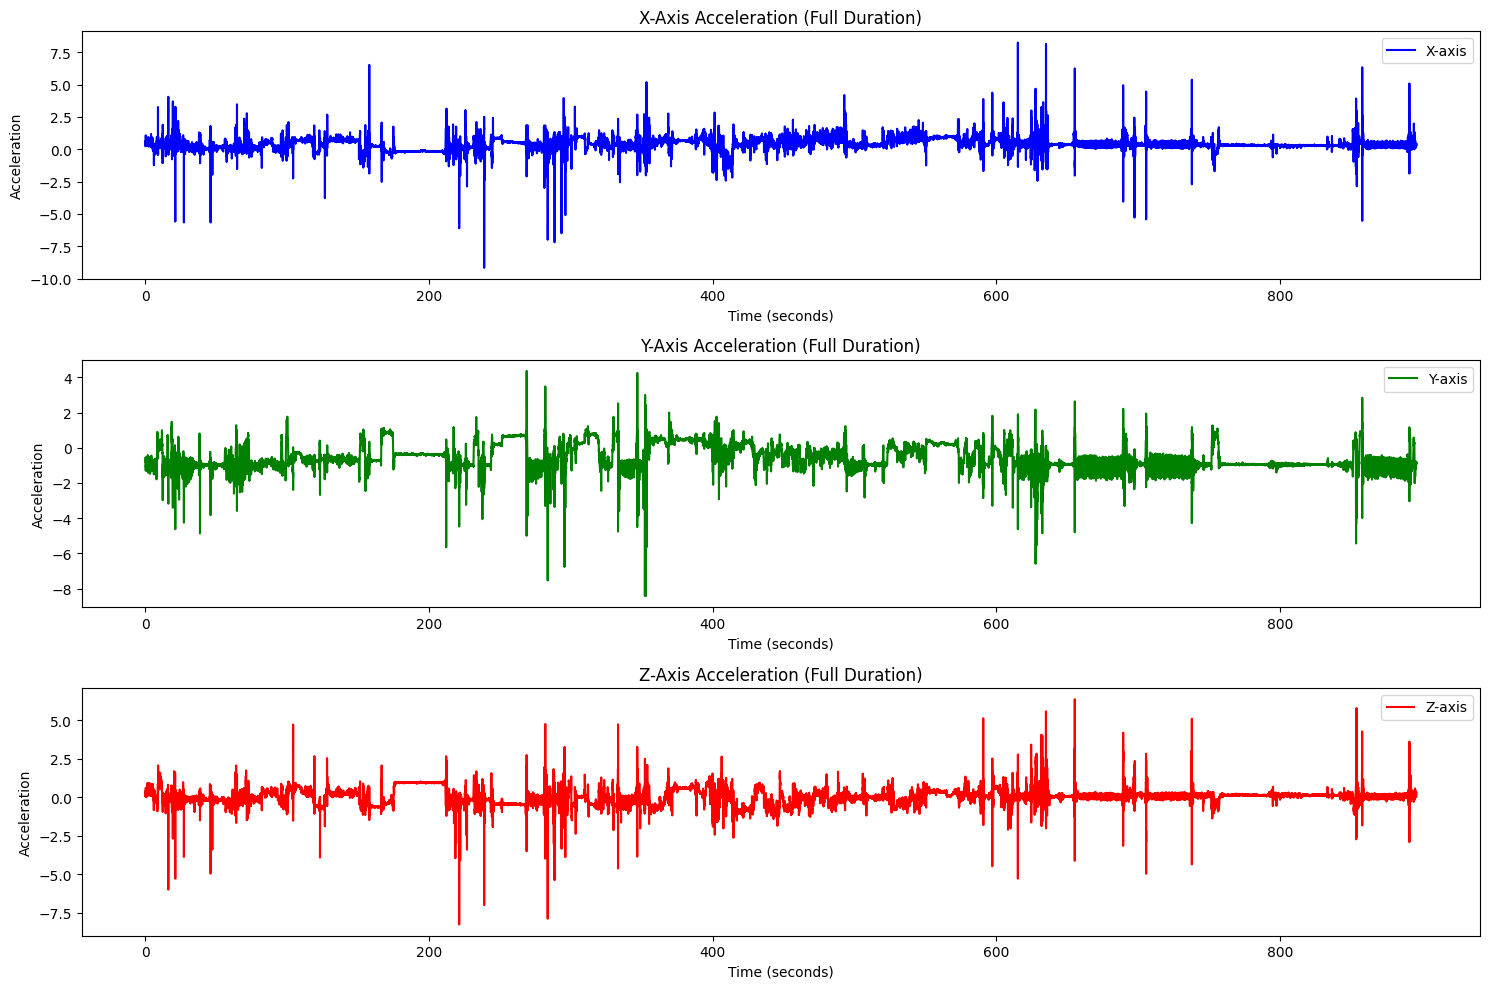

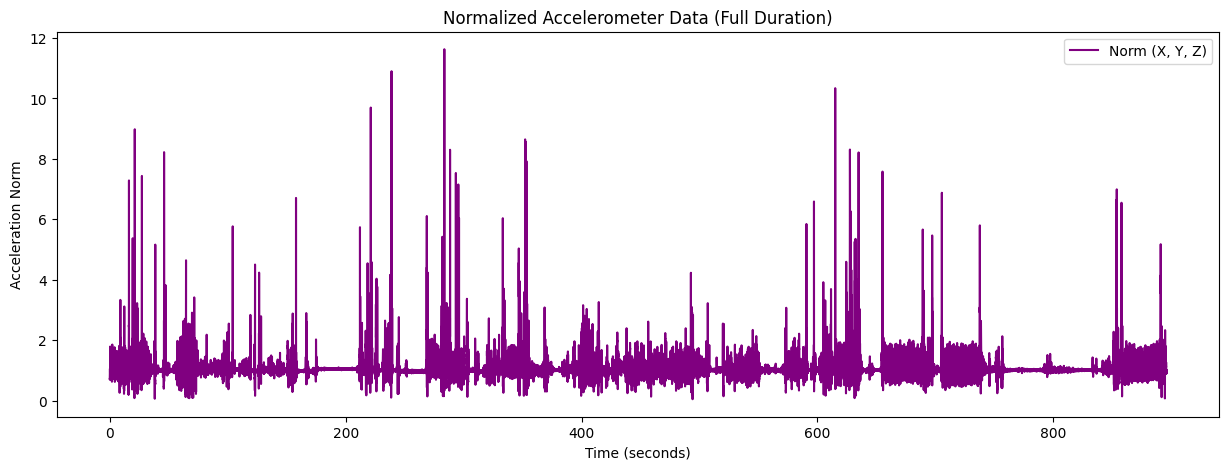

In [30]:
acc_data_path = "C:/Users/niki/Desktop/Step-counter/Data/STM2D48231610 (2024-11-28)RAW.csv"
sampling_frequency = 256
cleaned_data, time_seconds = load_accelerometer_data(acc_data_path, sampling_frequency)

plot_accelerometer_data_interval(cleaned_data, time_seconds, title_suffix="Full Duration")

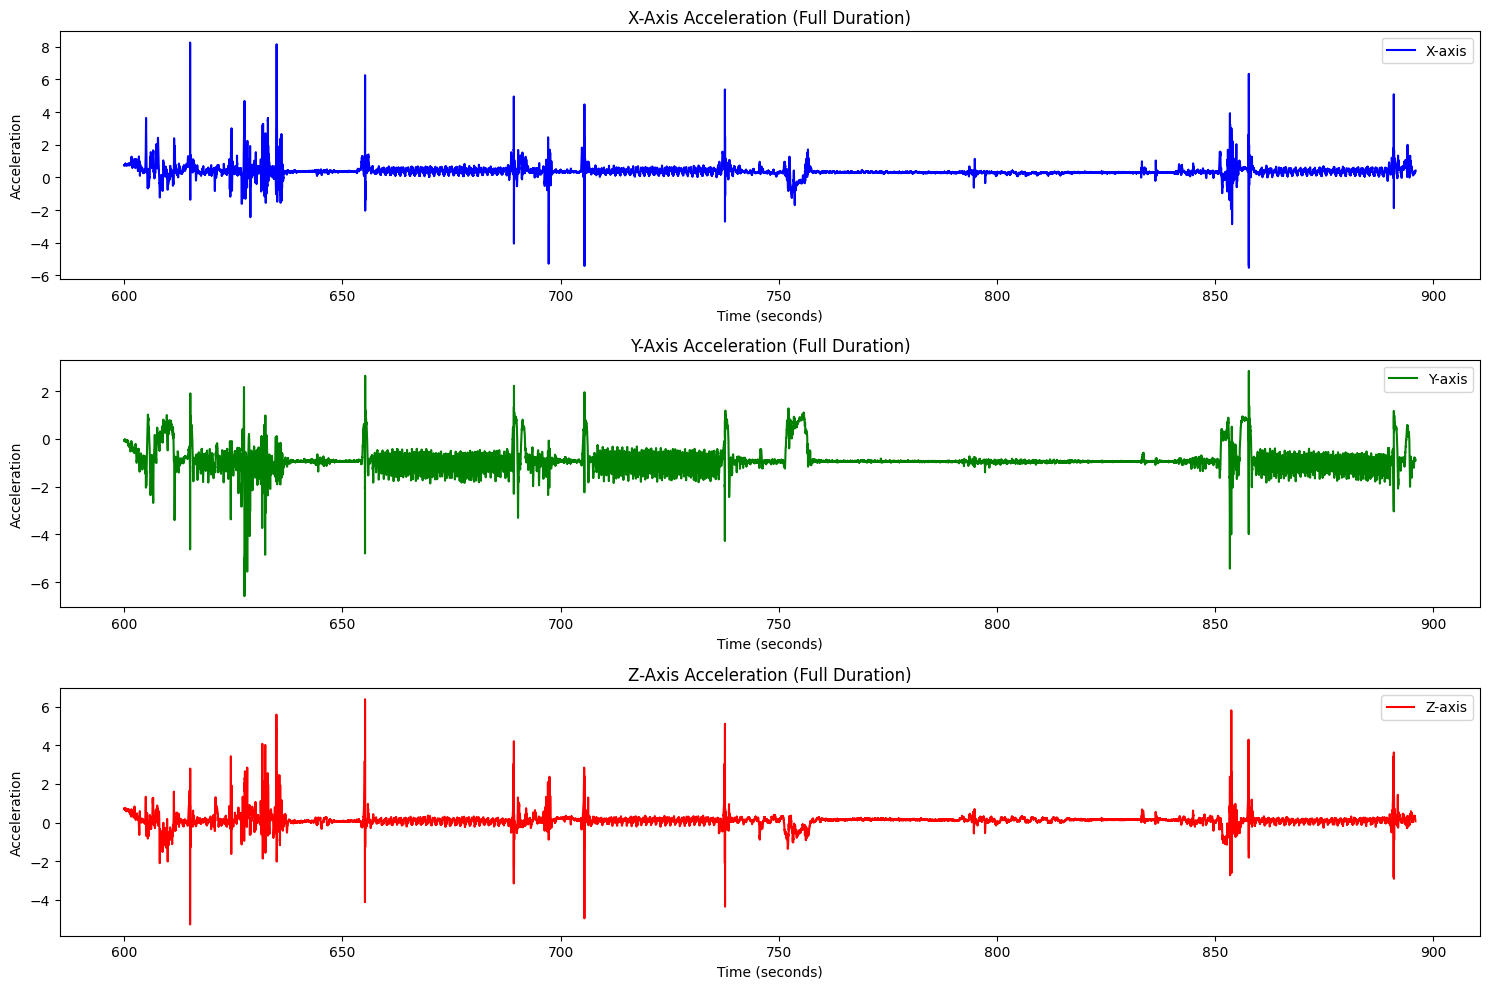

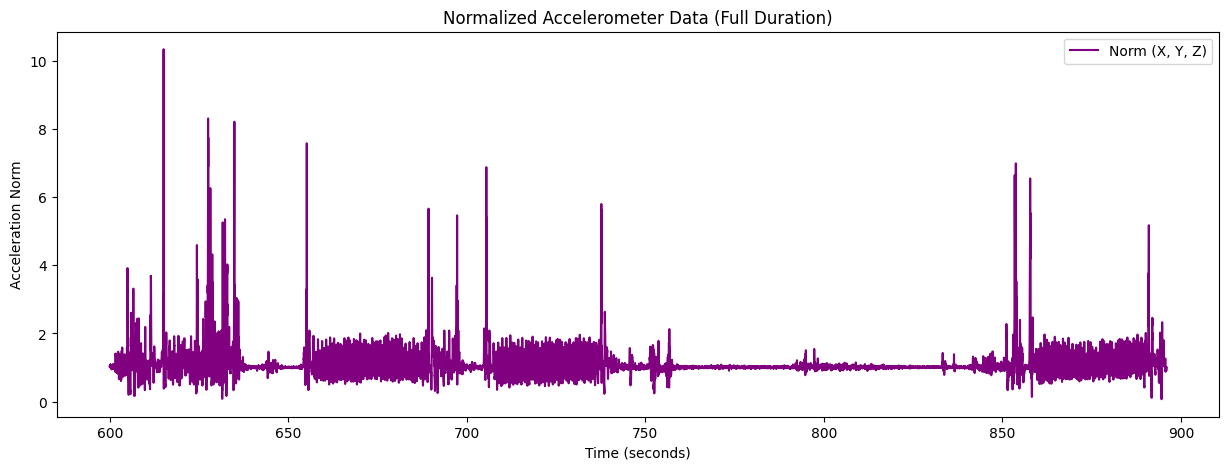

In [16]:
plot_accelerometer_data_interval(cleaned_data, time_seconds, start_time=600, end_time=None, title_suffix="Full Duration")

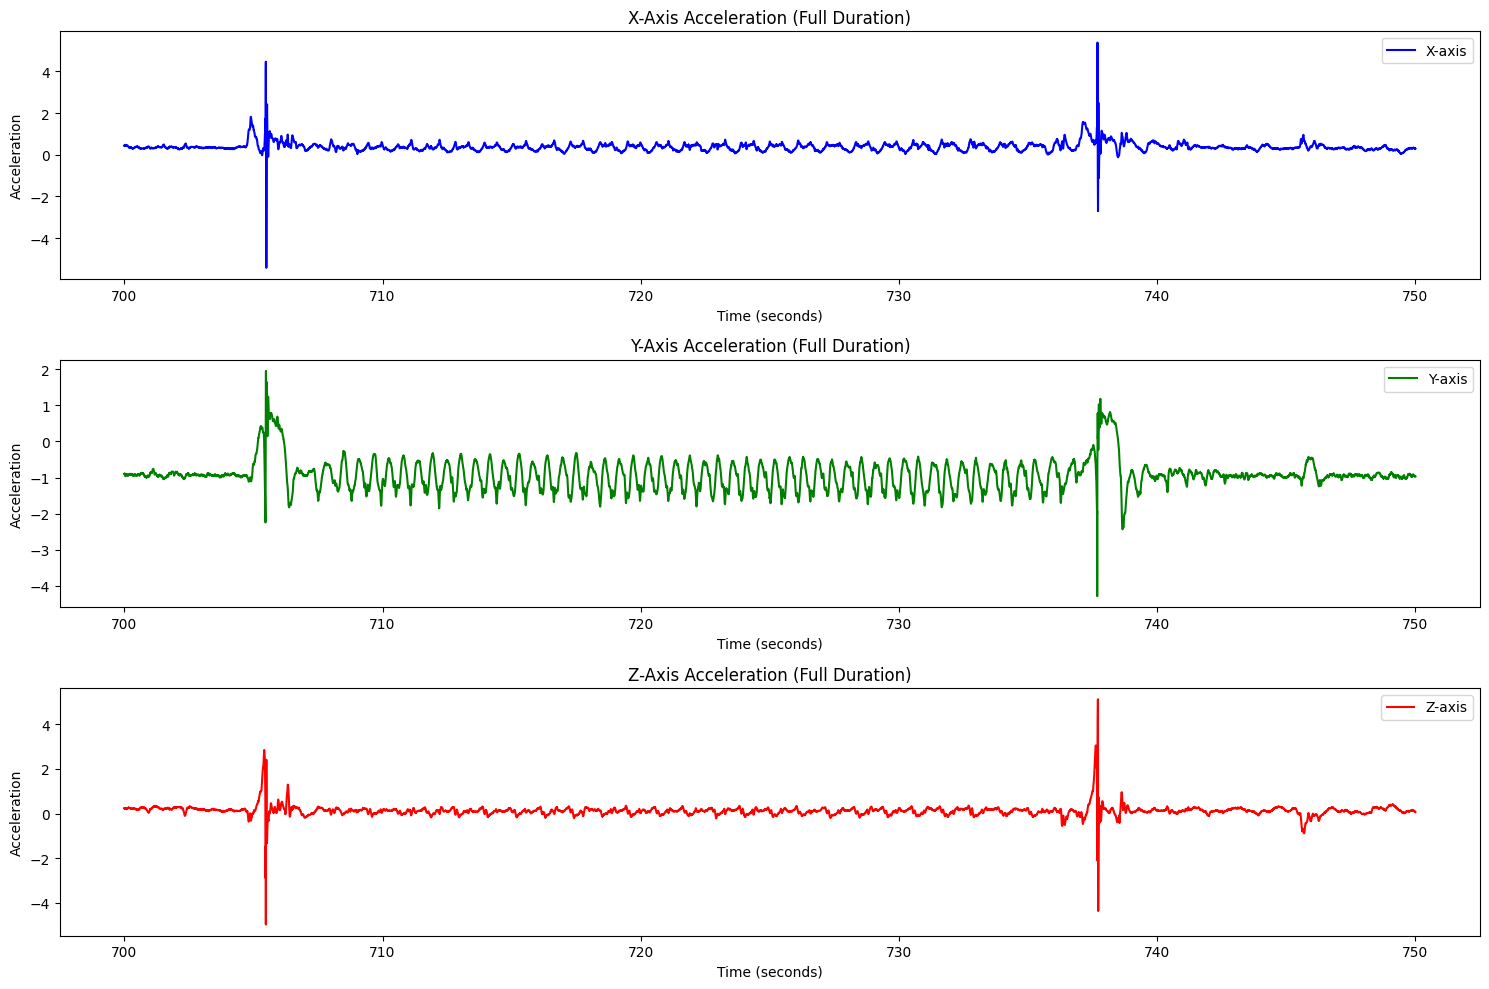

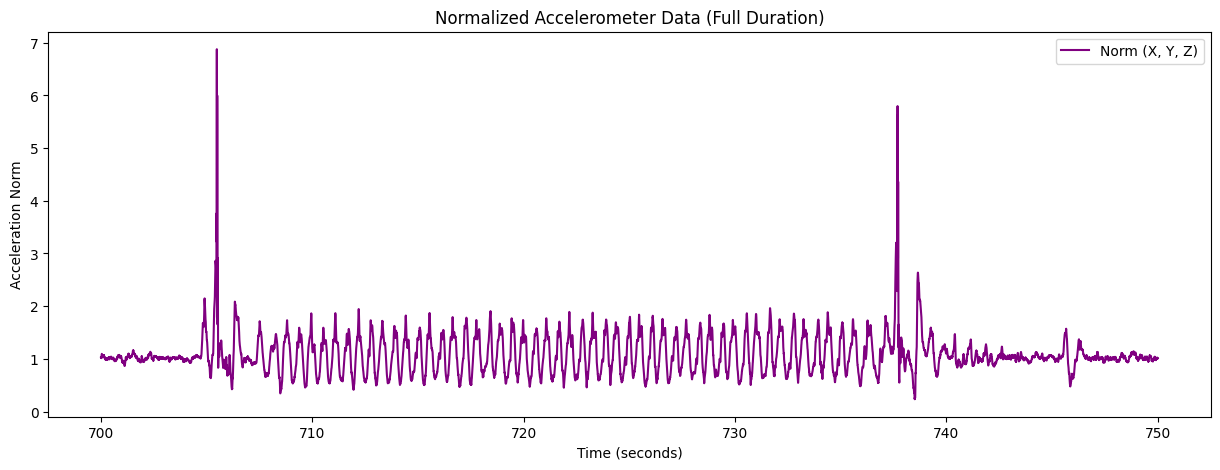

In [17]:
plot_accelerometer_data_interval(cleaned_data, time_seconds, start_time=700, end_time=750, title_suffix="Full Duration")

In [31]:
# Function to find peaks in the normalized data
def find_peaks_in_interval(normalized_data, time_seconds, start_time=None, end_time=None):
    # Filter data by interval
    if start_time is not None or end_time is not None:
        mask = (time_seconds >= (start_time or time_seconds.min())) & (time_seconds <= (end_time or time_seconds.max()))
        filtered_data = normalized_data[mask]
        filtered_time = time_seconds[mask]
    else:
        filtered_data = normalized_data
        filtered_time = time_seconds

    # Ensure filtered_time is a Series for indexing
    filtered_time = pd.Series(filtered_time.values, index=filtered_data.index)

    # Split the interval into two halves
    mid_point = len(filtered_data) // 2
    first_half_data = filtered_data.iloc[:mid_point]
    second_half_data = filtered_data.iloc[mid_point:]

    first_half_time = filtered_time.iloc[:mid_point]
    second_half_time = filtered_time.iloc[mid_point:]

    # Find the maxima in each half
    first_half_max = first_half_data.max()
    first_half_max_time = first_half_time[first_half_data.idxmax()]

    second_half_max = second_half_data.max()
    second_half_max_time = second_half_time[second_half_data.idxmax()]

    return {
        "first_half": {"time": first_half_max_time, "value": first_half_max},
        "second_half": {"time": second_half_max_time, "value": second_half_max},
    }

In [32]:
# Normalize the data
normalized_data = normalize_data(cleaned_data)

# Define a time interval (in seconds)
start_time = 700  
end_time = 750 

# Find the peaks in the interval
peaks = find_peaks_in_interval(normalized_data, time_seconds, start_time, end_time)
print("Peaks in the interval:")
print(f"First Half Peak - Time: {peaks['first_half']['time']}s")
print(f"Second Half Peak - Time: {peaks['second_half']['time']}s")
duration = peaks['second_half']['time'] - peaks['first_half']['time']
print(f"total_duration: {duration}s")

Peaks in the interval:
First Half Peak - Time: 705.48046875s
Second Half Peak - Time: 737.6875s
total_duration: 32.20703125s


# **SYNC**

In [33]:
df_clap_results

,Filename,Start Clap Seconds,End Clap Seconds,Start Clap Frame,End Clap Frame,Audio Path,Duration Between Claps
0,GX010003.MP4,0.372653,13.920975,16434,613915,c:\Users\niki\Desktop\Step-counter\Data\audio\...,13.548322
1,GX010004.MP4,1.871769,35.984422,82545,1586913,c:\Users\niki\Desktop\Step-counter\Data\audio\...,34.112653
2,GX010005.MP4,2.820862,35.027959,124400,1544733,c:\Users\niki\Desktop\Step-counter\Data\audio\...,32.207098
3,GX010006.MP4,0.828322,34.061406,36529,1502108,c:\Users\niki\Desktop\Step-counter\Data\audio\...,33.233084
4,GX010007.MP4,1.755828,17.824762,77432,786072,c:\Users\niki\Desktop\Step-counter\Data\audio\...,16.068934
5,GX010008.MP4,3.304535,16.974898,145730,748593,c:\Users\niki\Desktop\Step-counter\Data\audio\...,13.670363
6,GX010009.MP4,1.629229,10.584127,71849,466760,c:\Users\niki\Desktop\Step-counter\Data\audio\...,8.954898
7,GX010011.MP4,1.193968,10.407166,52654,458956,c:\Users\niki\Desktop\Step-counter\Data\audio\...,9.213197
8,GX010012.MP4,1.387415,10.876100,61185,479636,c:\Users\niki\Desktop\Step-counter\Data\audio\...,9.488685
9,GX010013.MP4,0.951859,9.564898,41977,421812,c:\Users\niki\Desktop\Step-counter\Data\audio\...,8.613039


Wie soll ich diese beiden Dinge synchronisieren? mit der stepcount.csv?

Wie baue ich das am besten in den restlichen code ein?

wie soll der workflow am besten sein?
